$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2$$
$$\ell(x, y) =
        \begin{cases}
            \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
            \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
        \end{cases}$$
>tips: 对于torch.nn.MSELoss函数size_average已弃用可使用上式选择是否取均值

In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

w =  2.000006675720215
b =  -1.49944453369244e-05
y_pred =  8.000011444091797


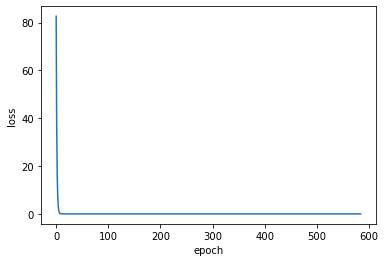

In [3]:
import torch
import matplotlib.pyplot as plt
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个数据，每个数据只有1个特征
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # model.parameters()自动完成参数的初始化操作
# optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.01)
epoch = 0
epoch_list = []
loss_list = []
# training cycle forward, backward, update
while True:
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    # print(epoch, loss.item())    
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    epoch += 1
    if(loss.item() < 1e-10):
        break

print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.item())

plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
